**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Comparaison kNN et régression logistique](static/10-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la comparaison des deux types de classificateurs vus en cours jusqu'à présent, à savoir la régression logistique et la classification kNN. Leur mise en oeuvre sera réalisée à l'aide de la librairie **scikit-learn** et la notion de **compromis biais-variance** sera étudiée. Le travail sera basé sur le jeu de données **Heart** entrevu précédemment

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 0 - Chargement des bibliothèques

In [6]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers pour l'affichage
from helpers import plot_classifier

# Outils divers
from tqdm import tqdm
from collections import defaultdict

# Machine Learning
# Compléter l'importation des modules scikit-learn requis au fur et à mesure de l'atelier
from sklearn.model_selection import train_test_split


In [7]:
# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## 1 - Lecture du jeu de données

<strong style="color: #006db4">Exercice 1-1: lire le fichier `Heart.csv`<strong/>

In [8]:
# Compléter le code ci-dessous ~ 1-2 lignes
HRT = pd.read_csv("../../data/Heart.csv")

In [9]:
# On supprime tout de suite les données manquantes. Ceci sera vu plus en détail plus tard dans le cours
HRT = HRT.dropna()

<strong style="color: #006db4">Exercice 1-2: afficher les dix premières lignes de la trame de données HRT</strong>

In [10]:
# Compléter le code ci-dessous ~ 1 ligne
HRT.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## 2 - Visualisation des données

La première étape avant toute étude d'apprentissage supervisé consiste à (essayer de) visualiser les données (voir cours de *Visualisation des données*). Cette étape est faite ici pour vous.

Remarque: l'affichage ci-dessous peut prendre quelques dizaines de secondes ...

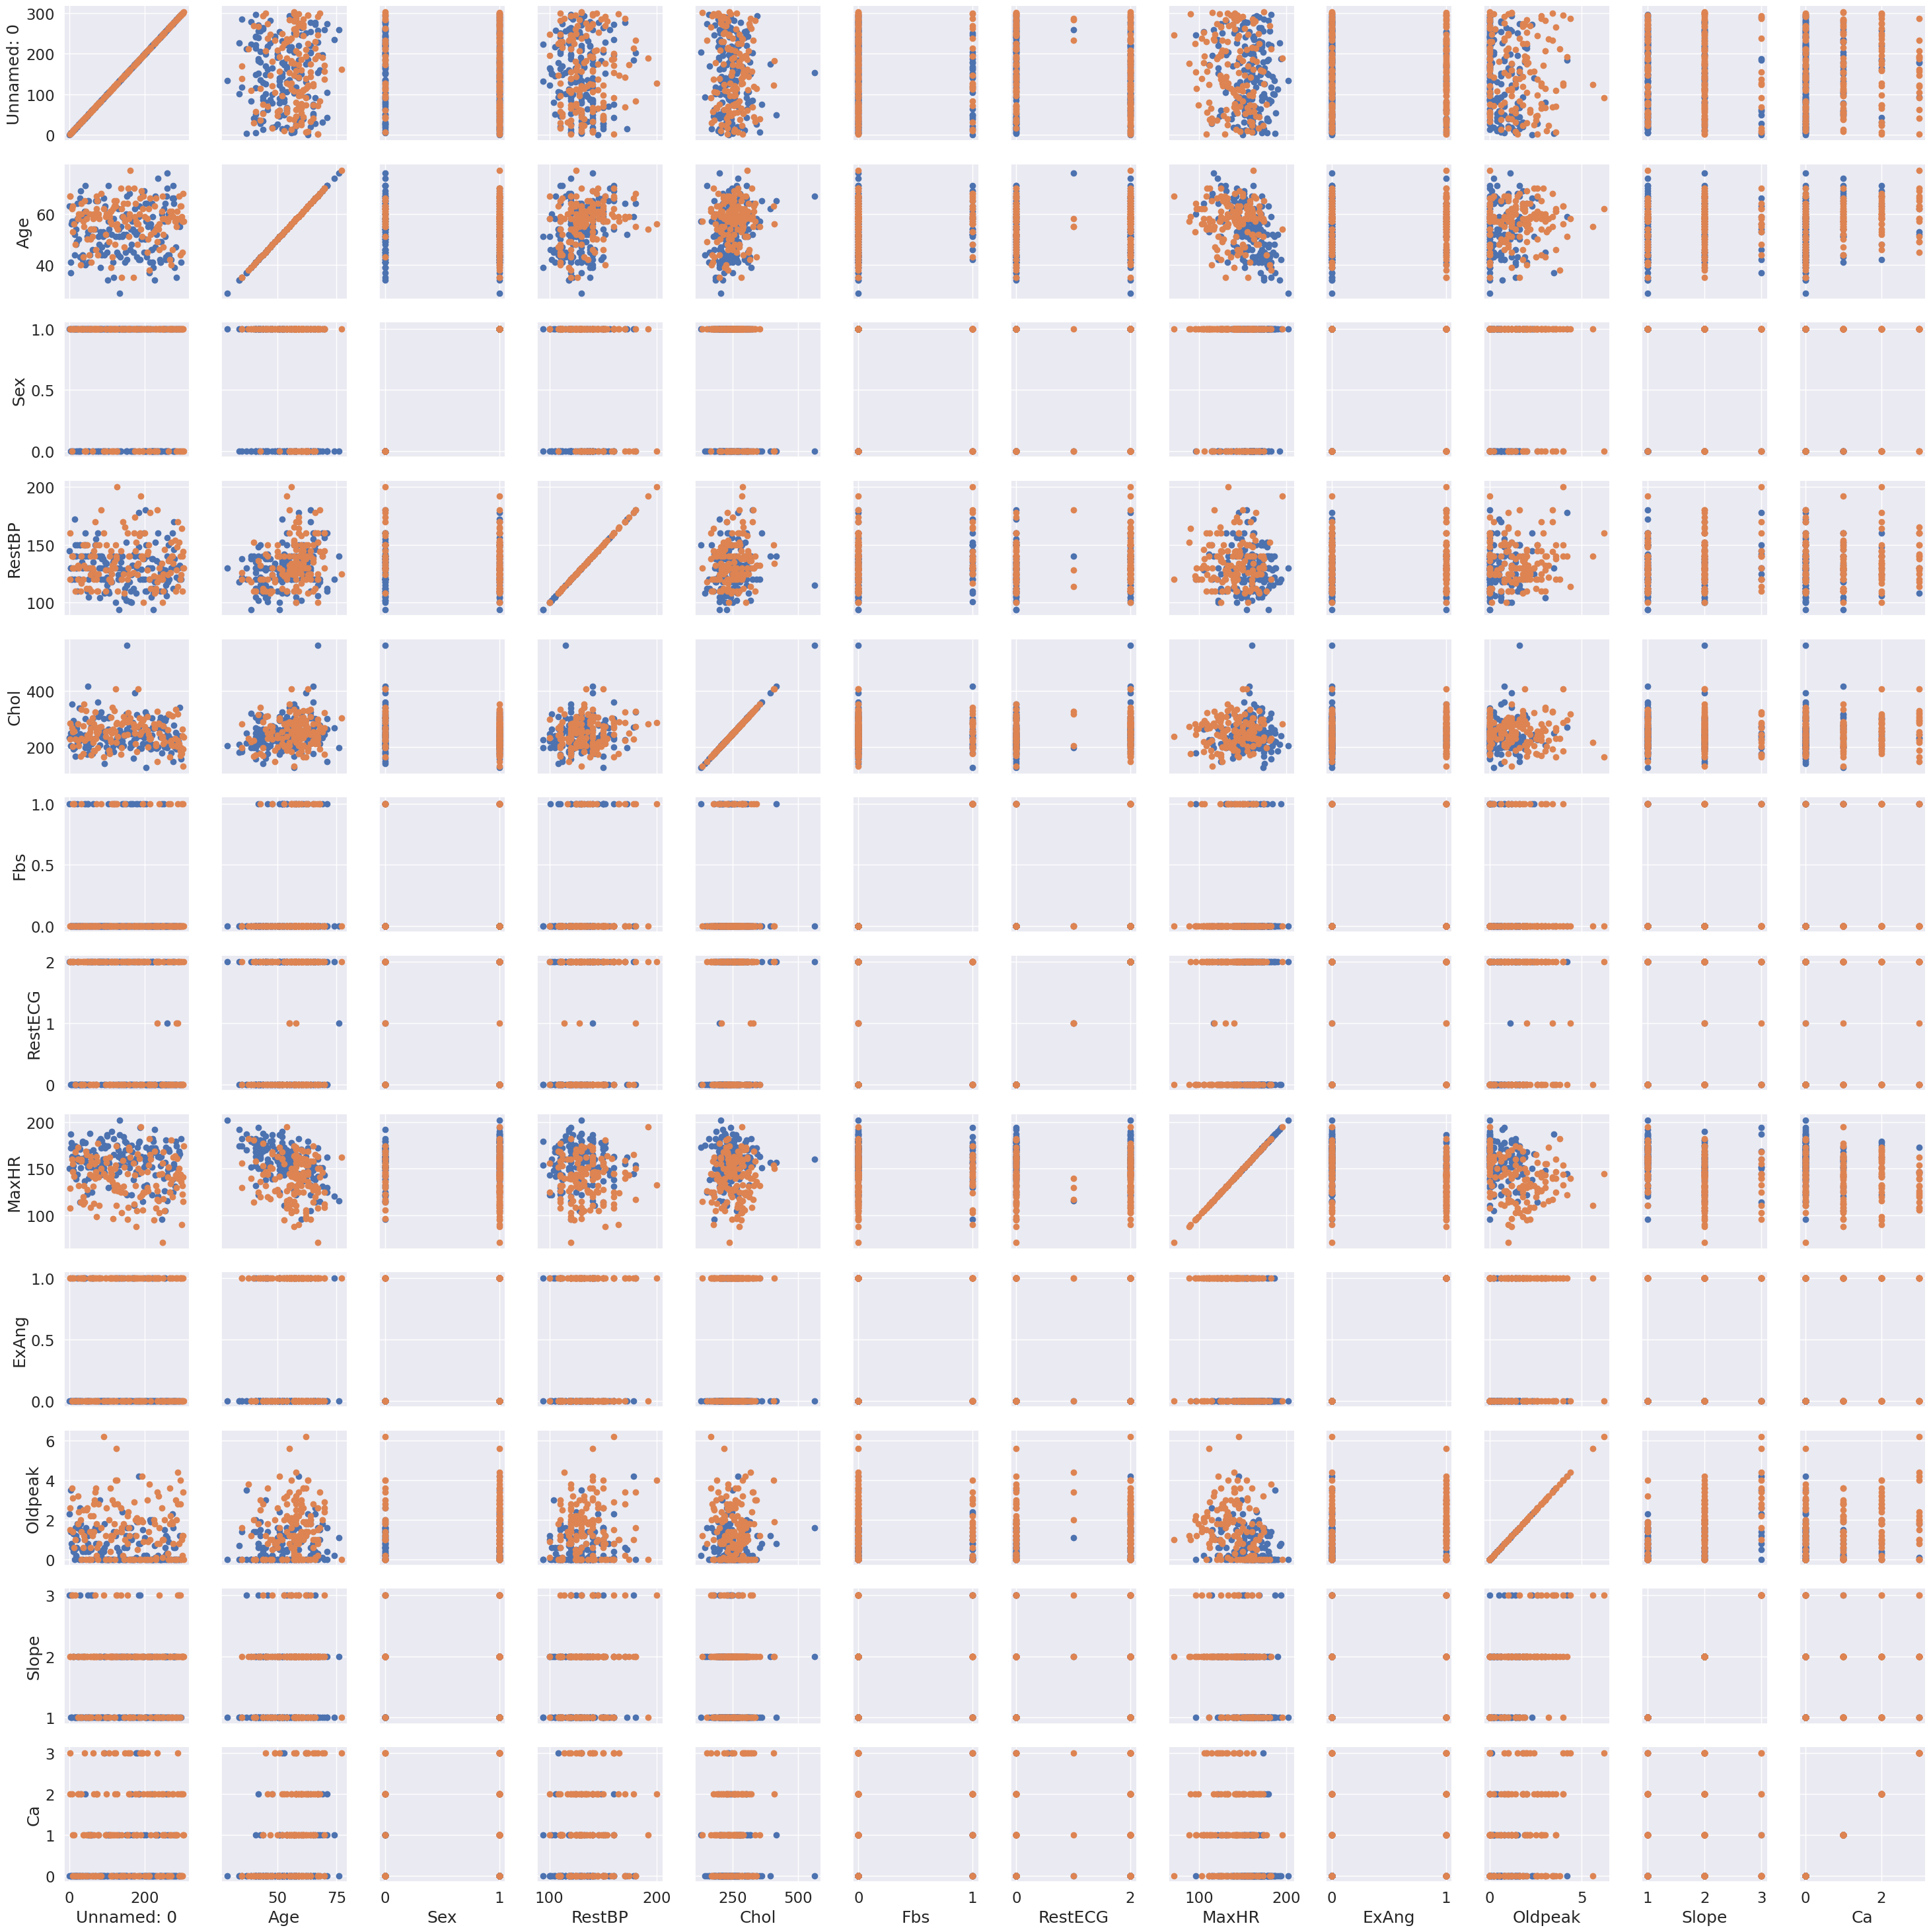

In [7]:
g = sns.PairGrid(HRT, hue="AHD")
g = g.map(plt.scatter)

Pour la suite de l'exercice, nous allons considérer uniquement les variables explicatives `Age` et `MaxHR`, ainsi que bien évidemment la variable réponse `AHD`

<strong style="color: #006db4">Exercice 2-1: créer une nouvelle trame de données ne contenant que les variables `Age`, `MaxHR` et `AHD`</strong>

In [11]:
# Compléter le code ci-dessous ~ 1 ligne
lstCols=['Age', 'MaxHR', 'AHD']
newDf = HRT[lstCols]

<strong style="color: #006db4">Exercice 2-2: afficher les dix premières lignes de la nouvelle trame de données `HRT2`</strong>

In [12]:
# Compléter le code ci-dessous ~ 1 ligne
HRT2 = newDf
HRT2.head()

,Age,MaxHR,AHD
0,63,150,No
1,67,108,Yes
2,67,129,Yes
3,37,187,No
4,41,172,No


## 3 - Affichage de HRT2

<AxesSubplot: xlabel='Age', ylabel='MaxHR'>

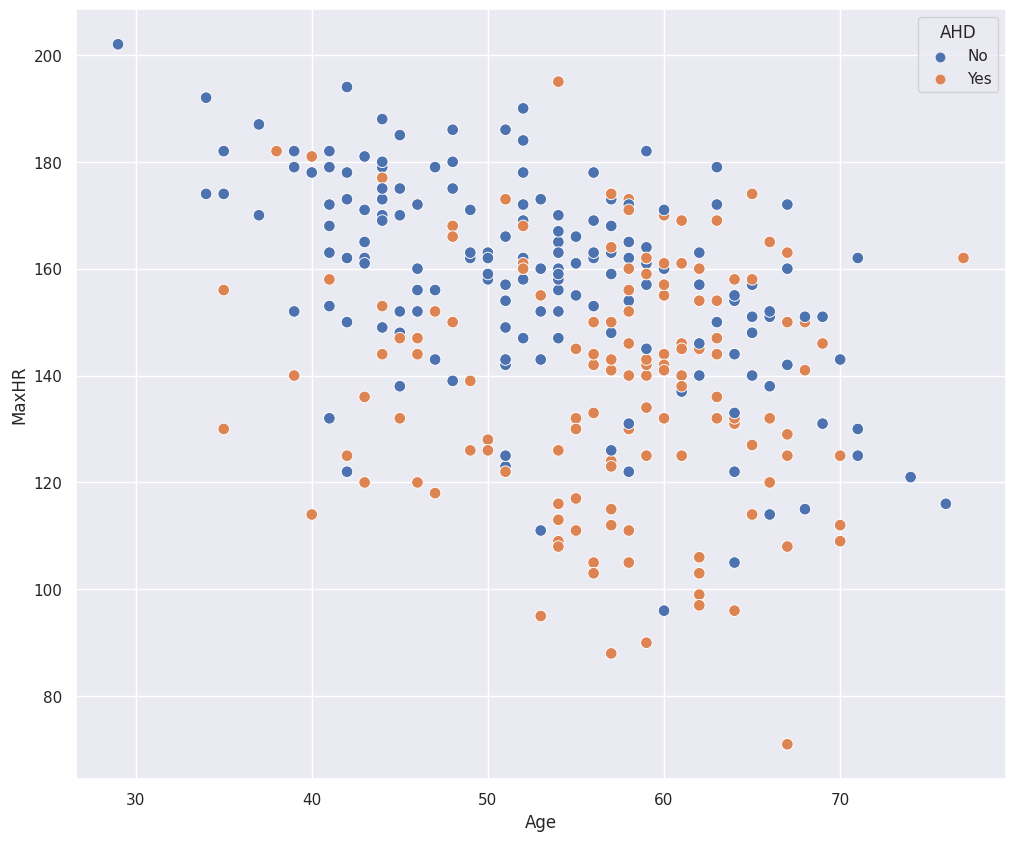

In [13]:
sns.set(style="darkgrid", rc={'figure.figsize':(12,10)})
sns.scatterplot(x='Age', y='MaxHR', hue="AHD", data=HRT2, s=70)

## 4 - Préparation des données en vue d'effectuer la validation des résultats des classificateurs

<strong style="color: #006db4">Exercice 4-1: extraire les variables explicatives dans un numpy array `X` et la variable réponse dans un vecteur `y`</strong>

In [14]:
# Compléter le code ci-dessous ~ 2 lignes
X = np.array(HRT2[['Age','MaxHR']])
y = HRT2['AHD']

In [12]:
type(y)

pandas.core.series.Series

<strong style="color: #006db4">Exercice 4-2: à l'aide de scikit-learn, sépararer les données en jeu d'entraînement et jeu de test. La taille du jeu de test doit représenter 30% de la taille du jeu de données initial et l'état du générateur aléatoire sera fixé à 2020 afin de permettre la reproductibilité</strong>

In [15]:
# Compléter le code ci-dessous ~ 2 lignes
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=2020)

In [16]:
print(f'X_train: {X_train.shape[0]} observations')
print(f'X_test: {X_test.shape[0]} observations')

X_train: 207 observations
X_test: 90 observations


## 5 - Régression logistique simple

<strong style="color: #006db4">Exercice 5-1: à l'aide de scikit-learn, effectuez la standardisation des données. Nommez les données standardisées `X1_scaled`</strong>

In [17]:
# Compléter le code ci-dessous ~ 3 lignes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X_train)



<strong style="color: #006db4">Exercice 5-2: à l'aide de scikit-learn, entraînez un modèle de régression logistique. Désactivez la régularisation.</strong>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)</a>
</p>

In [18]:
# Compléter le code ci-dessous ~ 1 ligne
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(penalty='none', random_state=2023)
### must work with X1_scaled
clf1.fit(X1_scaled, y_train)
#clf1.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=2023)

#### Affichage des résultats

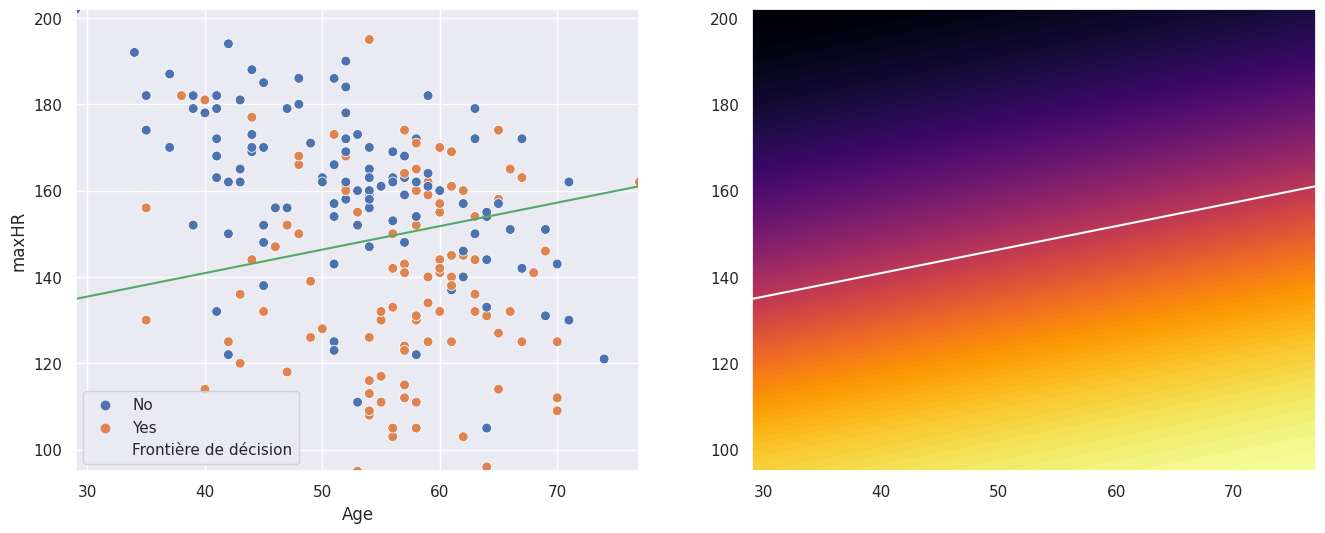

In [19]:
sns.set(rc={'figure.figsize':(16,6)})
plot_classifier(X_train, y_train, clf1, scaler, order=1, xlabel="Age", ylabel="maxHR")

<strong style="color: #006db4">Exercice 5-3: évaluez les performances sur le jeu d'entraînement. De quelle métrique s'agit-il ?</strong>

In [20]:
# Compléter le code ci-dessous ~ 1 ligne
### Mean accuracy
clf1.score(X1_scaled, y_train)

0.6956521739130435

<strong style="color: #006db4">Exercice 5-4: évaluez maintenant les performances sur le jeu de test</strong>

In [21]:
# Compléter le code ci-dessous ~ 2-3 lignes
X1_test_scaled = scaler.transform(X_test)
clf1.score(X1_test_scaled, y_test)

0.6666666666666666

## 6 - Régression logistique avec variables d'interaction et variables polynomiales d'ordre 2

<strong style="color: #006db4">Exercice 6-1: à l'aide de scikit-learn, construisez la matrice des prédicteurs `X2` en incluant les variables d'interactions et les variables polynomiales d'ordre 2. N'incluez pas le biais (ou intercept)</strong>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html"> class class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')</a>
</p>

In [39]:
# Compléter le code ci-dessous ~ 1-2 lignes
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
#X_train_poly = poly.fit_transform(X_train)
#X_train_poly = poly.transform(X_train)
#X2 = poly.fit_transform(X_train)

X_ = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_,y, shuffle=True, test_size=0.30, random_state=2020)

X2 = poly.fit_transform(X_train)

<strong style="color: #006db4">Exercice 6-2: à l'aide de scikit-learn, standardisez la matrice des prédicteurs</strong>

In [41]:
# Compléter le code ci-dessous ~ 1-3 lignes
scaler = StandardScaler()
#X_train_poly_scaled = scaler.fit_transform(X_train_poly)
#X_train_poly_scaled = scaler.transform(X_train_poly)
scaler.fit(X2)
X2_scaled = scaler.transform(X2)

<strong style="color: #006db4">Exercice 6-3:  l'aide de scikit-learn, entraînez un modèle de régression logistique. Comme précédemment, désactivez la régularisation.</strong>

In [45]:
# Compléter le code ci-dessous ~ 1 ligne
clf2 = LogisticRegression(max_iter=100000, penalty='none', random_state=2023, fit_intercept=True).fit(X2_scaled, y_train)
#clf2.fit(X2_scaled, y_train)



#### Affichage des résultats

/home/hadoop/Git_Ia/CegepSteFoy_IA/05_MachineLearning/2022_12_06/420-A52-SF-gr-10084-main/nbs/10-algorithme-knn/helpers.py:27: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[0].set_xlim(X[:,0].min(),X[:,0].max())


ValueError: X has 5 features, but StandardScaler is expecting 28 features as input.

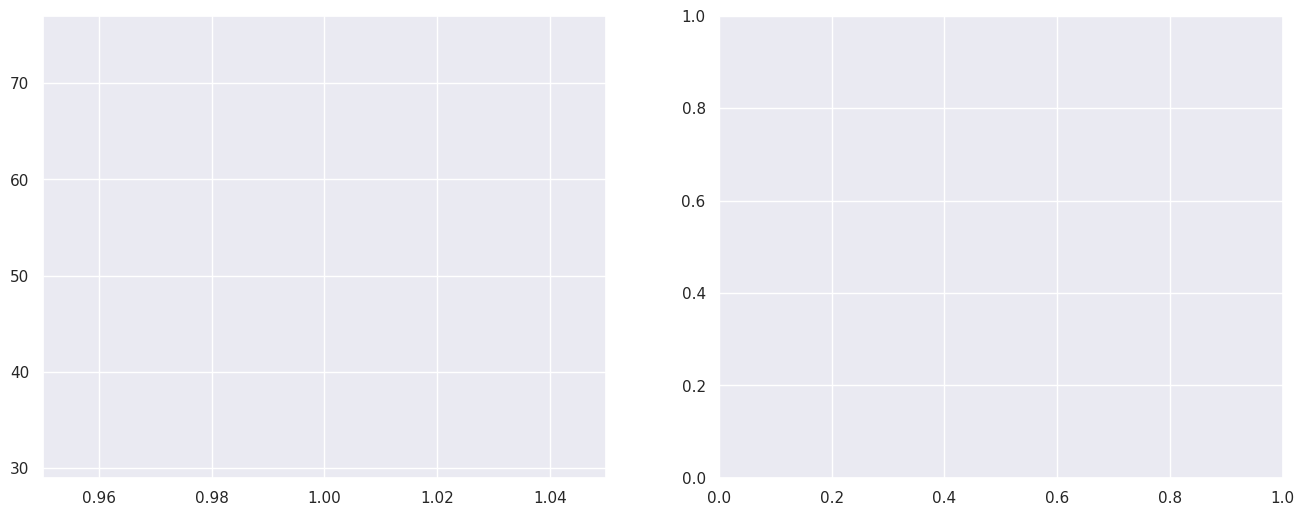

In [46]:
sns.set(rc={'figure.figsize':(16,6)})
plot_classifier(X_train, y_train, clf2, scaler, order=2, xlabel="Age", ylabel="maxHR")

<strong style="color: #006db4">Exercice 6-4: évaluez les performances sur le jeu d'entraînement</strong>

In [48]:
# Compléter le code ci-dessous ~ 1 ligne
clf2.score(X2_scaled, y_train)

0.7294685990338164

<strong style="color: #006db4">Exercice 6-5: évaluez maintenant les performances sur le jeu de test</strong>

In [51]:
# Compléter le code ci-dessous ~ 2-3 lignes
X2_test = poly.fit_transform(X_test)
X2_test_scaled = scaler.transform(X2_test)
print(clf2.score(X2_test_scaled, y_test))

0.7


## 7 - Régression logistique avec variables d'interaction et variables polynomiales d'ordre 3

<strong style="color: #006db4">Exercice 7-1: construisez la matrice des prédicteurs `X3` incluant les variables d'interactions et les variables polynomiales d'ordre 3. Ne pas inclure le biais (ou intercept)</strong>

In [114]:
# Compléter le code ci-dessous ~ 1-2 lignes
poly = PolynomialFeatures(degree=6,  include_bias=False)
X_ = poly.fit_transform(X)


<strong style="color: #006db4">Exercice 7-2: standardisez la matrice des prédicteurs</strong>

In [115]:
# Compléter le code ci-dessous ~ 1-3 lignes
scaler = StandardScaler()
scaler.fit(X_)
X3_scaled = scaler.transform(X_)

<strong style="color: #006db4">Exercice 7-3: entraînez un modèle de régression logistique. Comme précédemment, désactivez la régularisation. Quel paramètre supplémentaire devez-vous changer ?</strong>

In [116]:
# Compléter le code ci-dessous ~ 1 ligne
X_train, X_test, y_train, y_test = train_test_split(X3_scaled,y, shuffle=True, test_size=0.30, random_state=2020)
clf3 = LogisticRegression(penalty='none', random_state=2023, fit_intercept=True, max_iter=9999900000000) 
clf3.fit(X_train, y_train)

LogisticRegression(max_iter=9999900000000, penalty='none', random_state=2023)

#### Affichage des résultats

ValueError: X has 9 features, but StandardScaler is expecting 3 features as input.

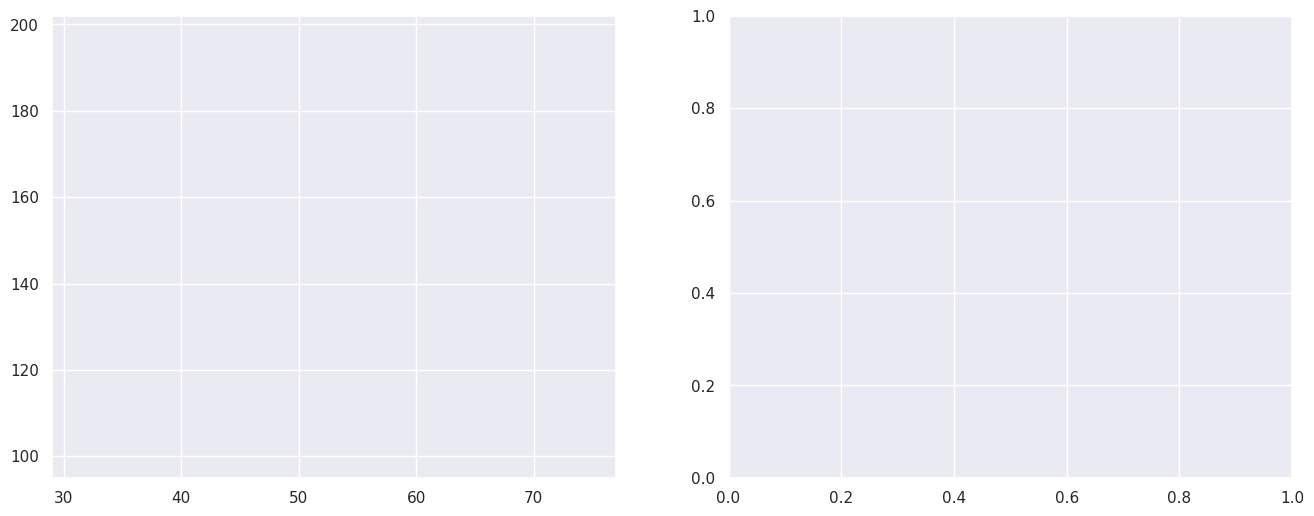

In [36]:
sns.set(rc={'figure.figsize':(16,6)})
plot_classifier(X_train, y_train, clf3, scaler, order=3, xlabel="Age", ylabel="maxHR")

<strong style="color: #006db4">Exercice 7-4: évaluez les performances sur le jeu d'entraînement</strong>

In [117]:
# Compléter le code ci-dessous ~ 1 ligne
clf3.score(X_train, y_train)

0.7246376811594203

<strong style="color: #006db4">Exercice 7-5: évaluez maintenant les performances sur le jeu de test</strong>

In [118]:
# Compléter le code ci-dessous ~ 2-3 lignes
clf3.score(X_test, y_test)

0.7111111111111111

## 8 - Régression logistique avec variables d'interaction et variables polynomiales d'ordre 6

<strong style="color: #006db4">Exercice 8-1: construisez la matrice des prédicteurs `X6` incluant les variables d'interactions et les variables polynomiales d'ordre 6. Ne pas inclure le biais (ou intercept)</strong>

In [30]:
# Compléter le code ci-dessous ~ 1-2 lignes
poly = PolynomialFeatures(degree=6, interaction_only=True, include_bias=False)
X_ = poly.fit_transform(X)
X6 = poly.fit_transform(X_train)

<strong style="color: #006db4">Exercice 8-2: standardisez la matrice des prédicteurs</strong>

In [31]:
# Compléter le code ci-dessous ~ 1-3 lignes
scaler = StandardScaler()
scaler.fit(X_)
X6_scaled = scaler.transform(X6)

<strong style="color: #006db4">Exercice 8-3: entraînez un modèle de régression logistique. Comme précédemment, désactivez la régularisation.</strong>

In [32]:
# Compléter le code ci-dessous ~ 1 ligne

clf6 = None

#### Affichage des résultats

Exception: 

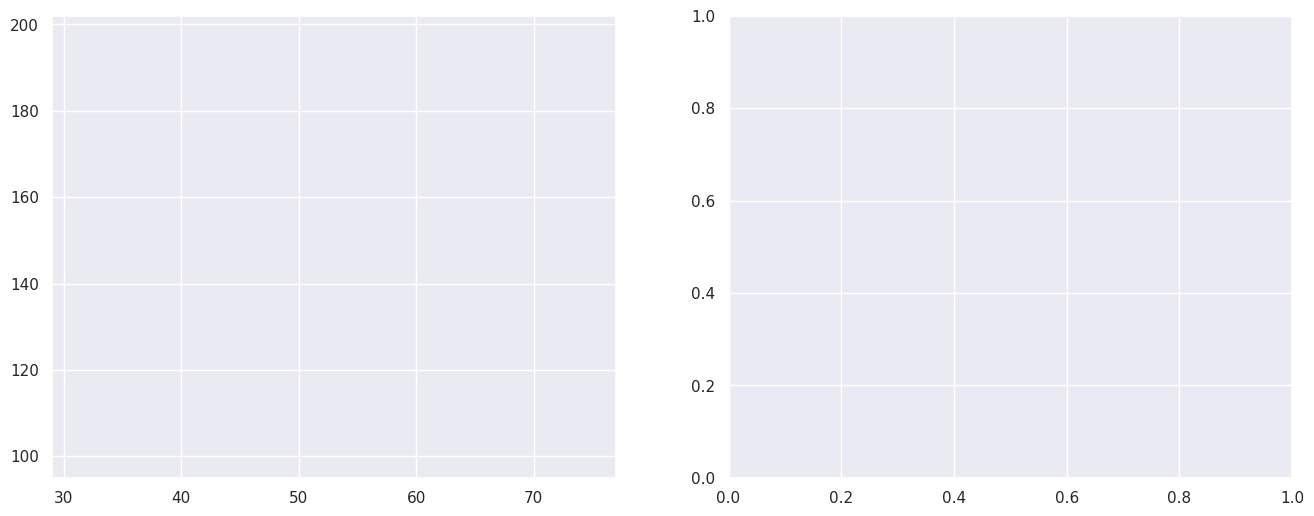

In [33]:
sns.set(rc={'figure.figsize':(16,6)})
plot_classifier(X_train, y_train, clf6, scaler, order=6, xlabel="Age", ylabel="maxHR")

<strong style="color: #006db4">Exercice 8-4: évaluez les performances sur le jeu d'entraînement</strong>

In [ ]:
# Compléter le code ci-dessous ~ 1 ligne


<strong style="color: #006db4">Exercice 8-5: évaluez maintenant les performances sur le jeu de test</strong>

In [ ]:
# Compléter le code ci-dessous ~ 2-3 lignes


## 9 - Classification kNN

<strong style="color: #006db4">Exercice 9-1: à l'aide de scikit-learn, entraînez un modèle de classification KNN. Choisissez K=22</strong>

#### Affichage des résultats

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)</a>
</p>

In [34]:
# Compléter le code ci-dessous ~ 2 lignes
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)



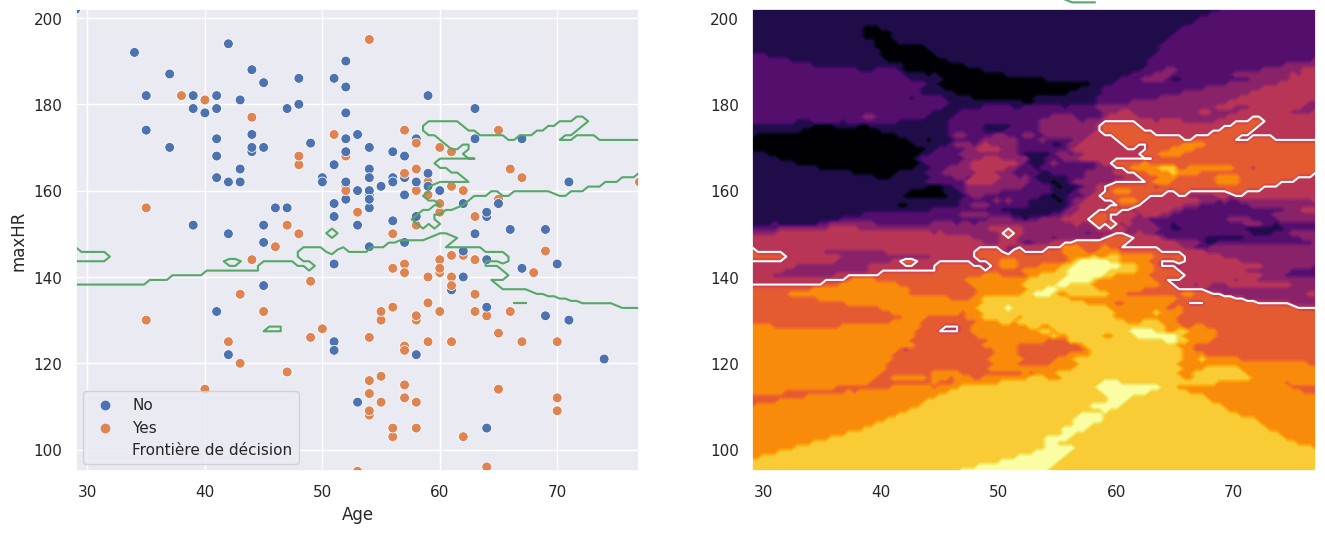

In [35]:
sns.set(rc={'figure.figsize':(16,6)})
#plot_classifier(X_train, y_train, neigh, scaler=None, xlabel="Age", ylabel="maxHR")
plot_classifier(X_train, y_train, neigh.fit(X_train, y_train), scaler=None, xlabel="Age", ylabel="maxHR")

<strong style="color: #006db4">Exercice 9-2: évaluez les performances sur le jeu d'entraînement</strong>

In [36]:
# Compléter le code ci-dessous ~ 1 ligne
neigh.score(X_train, y_train)

0.7198067632850241

<strong style="color: #006db4">Exercice 9-3: évaluez maintenant les performances sur le jeu de test</strong>

In [37]:
# Compléter le code ci-dessous ~ 1 ligne
#neigh.fit(X_test, y_test).score(X_test, y_test)
neigh.score(X_test, y_test)

0.7222222222222222

<strong style="color: #006db4">Exercice 9-4: Essayez d'autres valeurs de K. Quelle est selon la valeur de K offrant un bon compromis biais-variance?</strong>

## 10 - Recherche des meilleurs hyperparamètres

### 10 - 1 - Préparation des jeux de données

Nous allons maintenant considérer l'ensemble des variables explicatives du jeu de données **Heart**

<strong style="color: #006db4">Exercice 10-1-1: Encoder les variables explicatives catégorielles. Indice: utilisez pandas ;-)</strong>

In [38]:
# Compléter le code ci-dessous ~ 2-3 lignes
#ChestPain
#
lstCol = ['ChestPain', 'Thal']
col_y = 'AHD'
HRT_numerique = pd.get_dummies(data=HRT, columns = lstCol, drop_first=True, prefix=lstCol).copy()
print(HRT.Thal.unique())
print(HRT.ChestPain.unique())

HRT_numerique = HRT_numerique.loc[:, ~HRT_numerique.columns.str.contains('^Unnamed')]
dfX = HRT_numerique.copy();
dfY = dfX[col_y]
dfX.drop(col_y, axis=1, inplace=True)
#HRT_numerique.drop(0, index=1)

['fixed' 'normal' 'reversable']
['typical' 'asymptomatic' 'nonanginal' 'nontypical']


In [39]:
dfX.dtypes


Age                       int64
Sex                       int64
RestBP                    int64
Chol                      int64
Fbs                       int64
RestECG                   int64
MaxHR                     int64
ExAng                     int64
Oldpeak                 float64
Slope                     int64
Ca                      float64
ChestPain_nonanginal      uint8
ChestPain_nontypical      uint8
ChestPain_typical         uint8
Thal_normal               uint8
Thal_reversable           uint8
dtype: object

<strong style="color: #006db4">Exercice 10-1-2: Quel est le nombre de variables explicatives ?</strong>

In [40]:
# Compléter le code ci-dessous ~ 1 ligne
len(dfX.columns)

16

<strong style="color: #006db4">Exercice 10-1-3: à l'aide de scikit-learn, sépararer les données en jeu d'entraînement et jeu de test. La taille du jeu de test doit représenter 30% de la taille du jeu de données et l'état du générateur aléatoire sera fixé à 2020 afin de permettre la reproductibilité</strong>

In [41]:
# Compléter le code ci-dessous ~ 1 ligne
X_train, X_test, y_train, y_test = train_test_split(dfX,dfY, shuffle=True, test_size=0.30, random_state=2020)

### 10 - 2  - Régression logistique

<strong style="color: #006db4">Exercice 10-2: réalisez plusieurs fois une régression logistique polynomiale (cette fois-ci SANS variables d'interaction) en faisant varier l'ordre `n` de 1 à 15. Vous pouvez utiliser la fonction `polynomial` ci-dessous. Enregistrez les scores sur les jeux d'entraînement et de test pour chaque valeur de `n` dans le dictionnaire `history`</strong>

In [42]:
def polynomial(X, degree=2):
    vec = [np.ones((X.shape[0],1))]
    #print("vec:", vec)
    for d in range(1,degree+1):
        temp = np.array((X**d))
        vec.append(temp)
    return np.hstack(vec)

In [43]:
history = defaultdict(list)
for n in tqdm(range(1,15)):
    # Compléter le code ci-dessous ~ quelques lignes ...
    X_temp = polynomial(X_train, degree=n)[:, 1:]
    
    scaler = StandardScaler()
    scaler.fit(X_temp)
    X_scaled = scaler.transform(X_temp)
    
    clf_ordre = LogisticRegression(penalty="none", random_state=2020, fit_intercept=True, max_iter=30).fit(X_scaled, y_train)
    #clf_ordre = LogisticRegression(penalty="none", random_state=2020, fit_intercept=True, max_iter=30).fit(X_temp, y_train)
    
    
    Xn_test = polynomial(X_test, degree=n)[:, 1:]
    X_test_scaled = scaler.transform(Xn_test)
    
    
    score_train = clf_ordre.score(X_scaled, y_train)
    score_test = clf_ordre.score(X_test_scaled, y_test)
    
    
    history['train'].append(score_train)
    history['test'].append(score_test)

  0%|                                                    | 0/14 [00:00<?, ?it/s]/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

In [44]:
len(history.get('train'))

14

#### Affichage de la courbe de validation

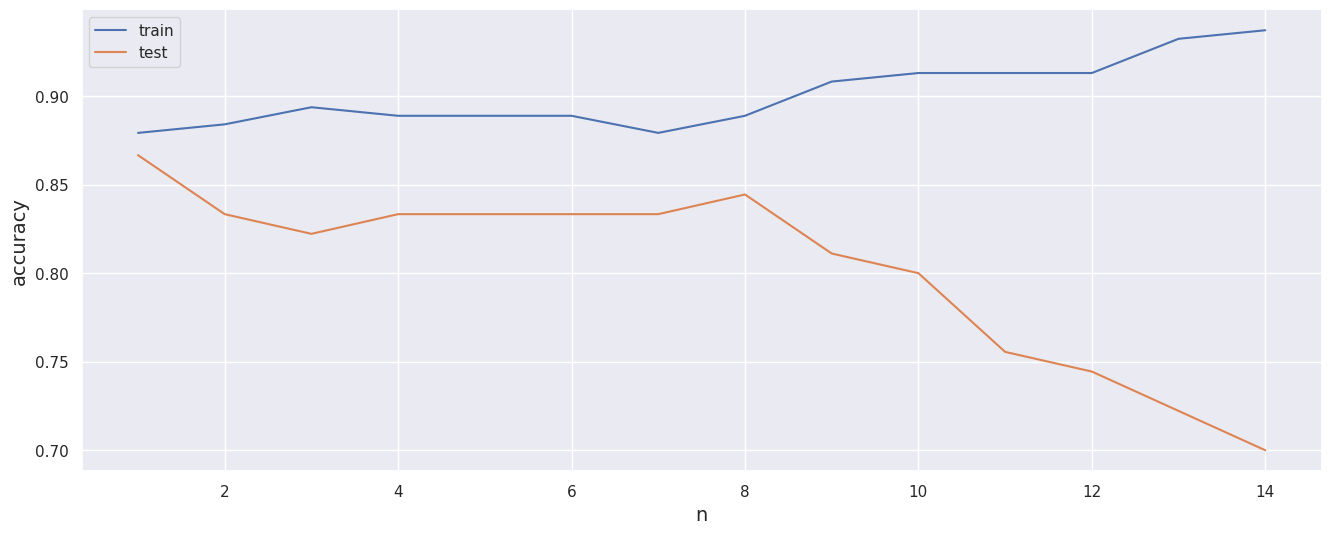

In [45]:
f, ax = plt.subplots(1,1)
ax.plot(range(1,15), history['train'], label="train")
ax.plot(range(1,15), history['test'], label="test")
ax.set_xlabel('n', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.legend()



### 10 - 3  - Classification kNN

<strong style="color: #006db4">Exercice 10-3: réalisez plusieurs fois une classification kNN en faisant varier le nombre de voisins `k` de 1 à 200. Enregistrez les scores sur les jeux d'entraînement et de test pour chaque valeur de `n` dans le dictionnaire `history`</strong>

In [46]:
history = defaultdict(list)
for k in tqdm(range(1,200)):
    # Compléter le code ci-dessous ~ quelques lignes ...
   
    
    neigh = KNeighborsClassifier(n_neighbors=k)        
    neigh.fit(X_train, y_train)
    score_train = neigh.score(X_train, y_train)
    score_test = neigh.score(X_test, y_test)
    history['train'].append( score_train )
    history['test'].append( score_test )

100%|█████████████████████████████████████████| 199/199 [00:07<00:00, 25.04it/s]


#### Affichage de la courbe de validation

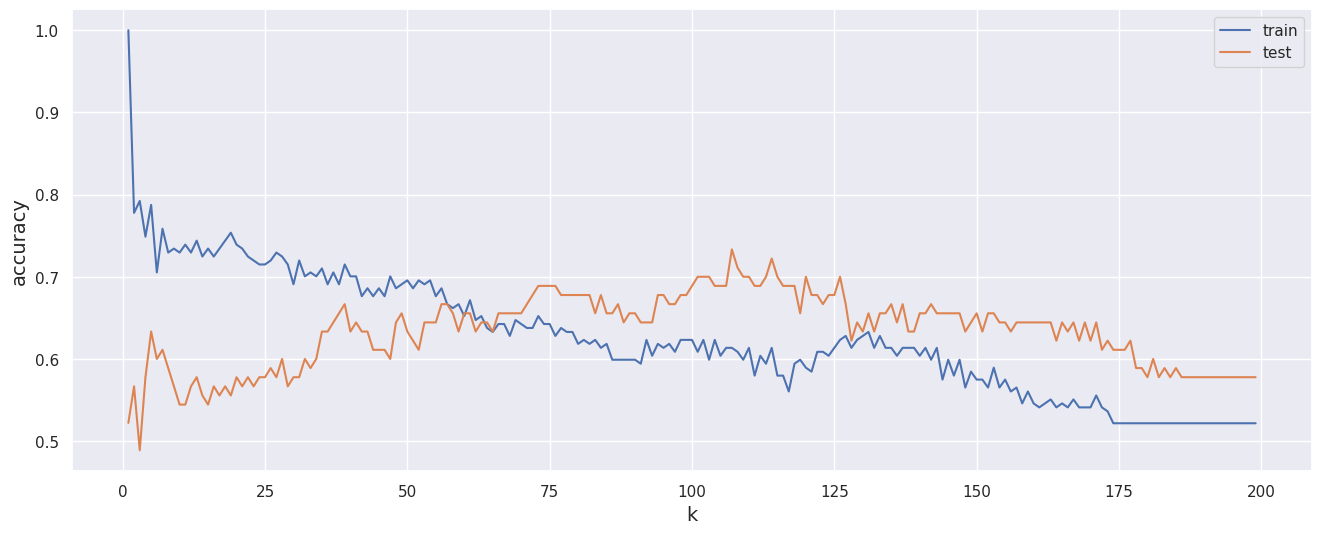

In [47]:
f, ax = plt.subplots(1,1)
ax.plot(range(1,200),history['train'], label="train")
ax.plot(range(1,200), history['test'], label="test")
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.legend()

### 11 - 3 - Choix du modèle

<strong style="color: #006db4">Exercice 11-3: Quel modèle choisissez-vous ? Quels sont les valeurs des hyperparamètres ?</strong>

In [ ]:
### resposta: regressão logística é mais simples q knn p/ precisão parecida.
### reg logística neste caso é melhor
### knn: mais q 10 var começa a perder performance

### Fin du TP